In [1]:
(require '[acausal.core :as a
           :refer [defmodel model q query p data identify]]
         '[clojure.pprint :as pp]
         :reload-all)

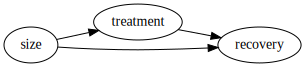

In [2]:
(defmodel kidney
    "Model from Charig et. al. 1986"
    {:size []
     :treatment [:size]
     :recovery [:treatment :size]})

In [13]:
5

5

In [12]:
(identify
    kidney
    (q [:recovery] :do [:treatment]))

### Test from Causality pg 66

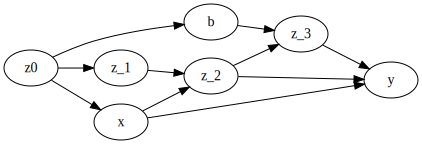

In [9]:
(defmodel wainer
    {:z0 []
     :b [:z0]
     :z_1 [:z0]
     :x [:z0]
     :z_2 [:z_1 :x]
     :z_3 [:z_2 :b]
     :y [:x :z_2 :z_3]})

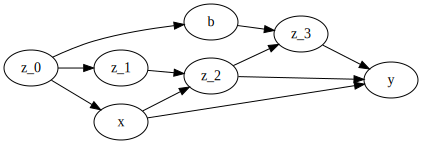

In [10]:
(defmodel wainer
    {:z_0 []
     :b [:z_0]
     :z_1 [:z_0]
     :x [:z_0]
     :z_2 [:z_1 :x]
     :z_3 [:z_2 :b]
     :y [:x :z_2 :z_3]})

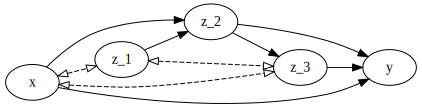

In [11]:
(defmodel simplified
    {:z_1 []
     :x []
     :z_2 [:z_1 :x]
     :z_3 [:z_2]
     :y [:x :z_2 :z_3]}
    #{:x :z_1 :z_3})

In [14]:
(= (a/make-latent (a/make-latent wainer :z_0) :b) simplified)

true

In [17]:
;(a/formula->latex
    (identify
        simplified
        (q [:y] :do [:x]));)

Note that this simplifies to:

$$\sum_{z_1, z_2, z_3} P(y \mid x, z_1, z_2, z_3) P(z_2 \mid x, z_1)
  \sum_x P(z_1 \mid x) P(x) P(z_3 \mid x_1, z_1, z_2)$$

Books says:

$$\sum_{z_1} \sum_{z_2} \sum_{z_3} P(y \mid z_2, z_3, x) P(z_2 \mid z_1, x)
  \times \sum_{x'} P(z_3 \mid z_1, z_2, x') P(z_1, x')$$

Note that $y \perp\!\!\perp z_1 \mid x, z_2, z_3$, therefore $P(y \mid x, z_1, z_2, z_3) = P(y \mid z_2, z_3, x)$

### page 92

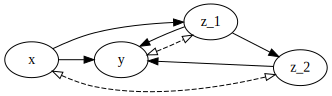

In [12]:
(defmodel causality-f
    {:y [:z_1 :z_2 :x]
     :z_2 [:z_1]
     :z_1 [:x]
     :x []}
    #{:y :z_1}
    #{:x :z_2})

In [11]:
(identify
    causality-f
    (q [:y] :do [:x]))

Simplifies to:

$$ \sum_{z_1, z_2} P(z_1 \mid x) P(y \mid x, z_1, z_2) \sum_x P(x \mid z_1, z_2) P(z_2 \mid x, z_1) $$

Book says:

$$ \sum_{z_1, z_2} P(y \mid z_1, z_2, x) P(z_1 \mid x) \sum_{x'} P(z_2 \mid z_1, x) P(x') $$

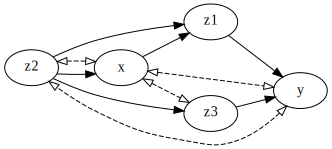

In [21]:
(defmodel causality-g
    {:z_2 []
     :x [:z_2]
     :z_1 [:x :z_2]
     :z_3 [:z_2]
     :y [:z_1 :z_3]}
    #{:x :z_2}
    #{:y :z_2}
    #{:x :y}
    #{:x :z_3})

In [17]:
(identify
    causality-g
    (q [:y] :do [:x]))

Simplifies to:

Book:

$$ \sum_{z_1} \sum_{z_2} \sum_{x'} P(y \mid z_1, z_2, x') P(x' \mid z_2) \times P(z_1 \mid z_2, x) P(z_2) $$

In [8]:
(System/getProperty "user.dir") 

"/home/josh/acausal"

In [2]:
5

5

In [3]:
*1

5

In [4]:
(clojure.doc *1)

CompilerException java.lang.RuntimeException: Unable to resolve symbol: doc in this context, compiling:(/tmp/form-init1155128182640966648.clj:1:1) 


class clojure.lang.Compiler$CompilerException: 

In [5]:
(def non-g
  (model
    {:x []
     :z_1 [:x]
     :z_2 []
     :y [:z_1 :z_2]}
    #{:x :z_2}
    #{:z_1 :z_2}))

#'user/non-g

In [8]:
(identify
    non-g
    (q [:y] :do [:x]))

#acausal.core.Fail{:hedges (#acausal.core.Hedge{:g #acausal.core.Model{:pa {:x #{}, :z_1 #{:x}, :z_2 #{}}, :bi #{#{:z_2 :x} #{:z_2 :z_1}}}, :s #{:z_2 :z_1}})}

In [2]:
(defn foo
    "Hi"
    [x]
    (+ x 1))

#'user/foo

In [1]:
(require '[clojupyter.misc.display :as display])

In [4]:
(display/hiccup-html
    [:div
    [:script {:src "require([\"add.js\"], () => { alert(inc(1)) })"}]
     ])
    ;[:script "alert(1)"]])

In [6]:
(display/hiccup-html
    [:div
      [:script {:src "file://add.js"}]
      [:script "alert(inc(1)"]])